In [10]:

import glob
import numpy as np
import cv2
import random
import argparse
import matplotlib.pyplot as plt


def imageSegmentationGenerator( images_path , segs_path ,  n_classes ):

	assert images_path[-1] == '/'
	assert segs_path[-1] == '/'

	images = glob.glob( images_path + "*.jpg"  ) + glob.glob( images_path + "*.png"  ) +  glob.glob( images_path + "*.jpeg"  )
	images.sort()
	segmentations  = glob.glob( segs_path + "*.jpg"  ) + glob.glob( segs_path + "*.png"  ) +  glob.glob( segs_path + "*.jpeg"  )
	segmentations.sort()

	colors = [  ( random.randint(0,255),random.randint(0,255),random.randint(0,255)   ) for _ in range(n_classes)  ]

	assert len( images ) == len(segmentations)

	for im_fn , seg_fn in zip(images,segmentations):
		assert(  im_fn.split('/')[-1] ==  seg_fn.split('/')[-1] )

		img = cv2.imread( im_fn )
		seg = cv2.imread( seg_fn )
        
# 		print np.unique( seg )

		seg_img = np.zeros_like( seg )

		for c in range(n_classes):
			seg_img[:,:,0] += ( (seg[:,:,0] == c )*( colors[c][0] )).astype('uint8')
			seg_img[:,:,1] += ((seg[:,:,0] == c )*( colors[c][1] )).astype('uint8')
			seg_img[:,:,2] += ((seg[:,:,0] == c )*( colors[c][2] )).astype('uint8')

# 		cv2.imshow("img" , img )
# 		cv2.imshow("seg_img" , seg_img )
# 		cv2.waitKey()
        plt.imshow(img)
        plt.show()



# parser = argparse.ArgumentParser()
# parser.add_argument("--images", type = str  )
# parser.add_argument("--annotations", type = str  )
# parser.add_argument("--n_classes", type=int )
# args = parser.parse_args()


# imageSegmentationGenerator(args.images ,  args.annotations  ,  args.n_classes   ) 


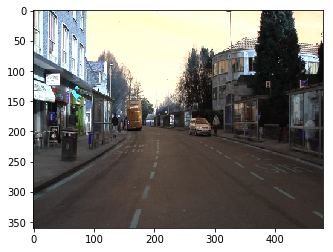

In [11]:
train_data_path='../dataset1/images_prepped_train/'
train_anno_path='../dataset1/annotations_prepped_train/'
n_class=10

imageSegmentationGenerator(train_data_path,train_anno_path,n_class)